# The Task
1) the goal of this project is to analyze diabetes data
2) pick any group in this dataset as an initial comparison point
3) pick a feature/measure/indicator
4) compare above group to any other (different) group  - you only need to do one additional group comparison (but you’re welcome to do more comparisons if you feel compelled to do so)
5) the analysis should include some descriptive statistics
6) the analysis should include one cleaning task (or more)
7) the analysis should include one visualization (or more)
8) the analysis should include a brief conclusion statement (not more than two or three sentences)

For my analysis, I would like to understand what the diabetes situation is for pediatric patients. Therefore, I will select the 0 to 10 years age bracket. 
Within that bracket, I will look at the number of patients from a gender and race perspective. In other words, I will compare the number of diabetic patients for the 0-10 year age bracket 
and see how the males compare to females and also if there is any ethnicity that stands out. I will consider the time in hospital as the metric to compare. I will enrich the analysis with 
the number of medications administered during the encounter.
            


In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
#Missing Values. Deal with non-standard missing values when loading the file.
missing_values = ["n/a","na","--","-"]
#Load the data file into a data frame.
df = pd.read_csv ('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv',na_values = missing_values)

# Perform some Exploratory Data Analysis of the file loaded

In [3]:
#Show the first 10 rows of the data frame.
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#Show the last 10 rows of the data frame.
df.tail(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101757,443842136,181593374,Caucasian,Female,[70-80),?,1,1,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101759,443842778,86472243,Caucasian,Male,[80-90),?,1,1,7,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [5]:
#In this case the describe function shows a statistical summary of the columns containing numeric values. 
#All columns containing some sort of id are not useful for statistical purposes.
#Other columns do not show any statistic because there are rows with strings.
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [6]:
#The data frame contains 101,766 rows by 50 columns.
df.shape

(101766, 50)

In [7]:
#Get the labels of the 50 columns.
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
#df.info() function is used to get a concise summary of the dataframe. 
#It helps with exploratory analysis of the data. It shows the name of the columns, count of non-nulls and data types.
#df.types would only provide a column with the labels and another column with the data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
#See what unique values are populating race
df ['race'].unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [10]:
#Show unique values for gender column
df ['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [11]:
#Show unique values for age column. Age Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
df ['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [12]:
#Show unique values for weight
df ['weight'].unique()

array(['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [13]:
#Show unique values for admission_type_id column
df['admission_type_id'].unique()

array([6, 1, 2, 3, 4, 5, 8, 7], dtype=int64)

In [14]:
#show unique values for discharge_disposition_id column
df['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [15]:
#Show unique values for time_in_hospital. Integer number of days between admission and discharge
df['time_in_hospital'].unique()

array([ 1,  3,  2,  4,  5, 13, 12,  9,  7, 10,  6, 11,  8, 14],
      dtype=int64)

In [16]:
#Show unique values for num_medications. Number of distinct generic names administered during the encounter
df['num_medications'].unique()

array([ 1, 18, 13, 16,  8, 21, 12, 28, 17, 11, 15, 31,  2, 23, 19,  7, 20,
       14, 10, 22,  9, 27, 25,  4, 32,  6, 30, 26, 24, 33,  5, 39,  3, 29,
       61, 40, 46, 41, 36, 34, 35, 50, 43, 42, 37, 51, 38, 45, 54, 52, 49,
       62, 55, 47, 44, 53, 48, 57, 59, 56, 60, 63, 58, 70, 67, 64, 69, 65,
       68, 66, 81, 79, 75, 72, 74], dtype=int64)

In [17]:
#Show unique values for number_emergency. Number of emergency visits of the patient in the year preceding the encounter.
df['number_emergency'].unique()

array([ 0,  1,  2,  4,  3,  9,  5,  7,  6,  8, 22, 25, 10, 13, 42, 16, 11,
       28, 15, 14, 18, 12, 21, 20, 19, 46, 76, 37, 64, 63, 54, 24, 29],
      dtype=int64)

In [18]:
#Count how many '?' values there are in the data frame by column.
countsign = (df == '?').sum()
countsign


encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [19]:
#To see how many records there are by age brackets sorted in descending order.
df.groupby (['age'])['encounter_id'].count().sort_values(ascending=False)


age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: encounter_id, dtype: int64

In [20]:
#To see how many records there are by race categories sorted in descending order.
df.groupby (['race'])['encounter_id'].count().sort_values(ascending=False)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: encounter_id, dtype: int64

In [21]:
#To see how many records there are by gender categories sorted in descending order.
df.groupby (['gender'])['encounter_id'].count().sort_values(ascending=False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [22]:
#Checking to see missing data. The isnull function equals the isna function in this case, and provides the same number of 
#records for the same columns.
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [23]:
#To make sure encounter_id is unique and there are no duplicates
df['encounter_id'].is_unique

True

In [24]:
#To replace the '?' value under the race column for my analysis of the [0-10) bracket. 
#In particular, there is a record for my analysis with '?' in the race. I will replace '?' with "Other"
df.loc[32389,'race'] = 'Other'

I want to make sure I am using data for diabetes. I will use the diag_1 code to identify the patients diagnosed with diabetes. 
In this case, the ICD-9 codes starting with 250. refer to diabetes.

# ICD-9-CM diagnosis codes defining diabetes

ICD-9-CM code &	Description:
250.0x	Diabetes mellitus without mention of complications
250.1x	Diabetes with ketoacidosis
250.2x	Diabetes with hyperosmolarity
250.3x	Diabetes with other coma
250.4x	Diabetes with renal manifestations
250.5x	Diabetes with ophthalmic manifestations
250.6x	Diabetes with neurological manifestation
250.7x	Diabetes with peripheral circulatory disorders
250.8x	Diabetes with other specified manifestations
250.9x	Diabetes with unspecified complications
250.x0 or 250.x1	Diabetes – not stated as uncontrolled
250.x2 or 250.x3	Diabetes – uncontrolled

Source: National Library of Medicine https://www.ncbi.nlm.nih.gov/books/NBK368403/table/sb203.t5/ 


# Cleaning Tasks

I will create another data frame with only the columns which I will consider for my analysis: 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 
    'time_in_hospital','num_medications', 'number_emergency', 'diag_1','change', 'diabetesMed', 'readmitted'

In [25]:
#Create a new data frame with the columns I am interested to see.
df2= df[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 
    'time_in_hospital','num_medications', 'number_emergency', 'diag_1','change', 'diabetesMed', 'readmitted']]

In [26]:
df2.head(10)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_medications,number_emergency,diag_1,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),1,1,0,250.83,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),3,18,0,276,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),2,13,0,648,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),2,16,0,8,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,8,0,197,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),3,16,0,414,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),4,21,0,414,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),5,12,0,428,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),13,28,0,398,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),12,18,0,434,Ch,Yes,NO


In [27]:
#This have reduced the 50 columns to just 12
df2.shape

(101766, 12)

In [28]:
#Since the values are strings, I will filter those ones that start with 250.
#To limit the number of rows to the 'diag_1' that refer to diabetes and start with 250.
df3 = df2[df['diag_1'].str.startswith('250')]

In [29]:
# The number of records get substantially reduced from 101.7K records to just 8.7K when looking at diagnosis starting with 250 
df3.shape

(8757, 12)

In [30]:
#Another similar approach I found to filter the records by using the apply function.
df3=df2[df['diag_1'].apply(lambda x: x.startswith('250'))]

In [31]:
df3.shape

(8757, 12)

In [32]:
#To see how many records there are by age brackets sorted in descending order in the new data frame.
df3.groupby (['age'])['encounter_id'].count().sort_values(ascending=False)

age
[50-60)     1465
[40-50)     1447
[60-70)     1376
[70-80)     1363
[30-40)      906
[80-90)      782
[20-30)      679
[10-20)      475
[0-10)       136
[90-100)     128
Name: encounter_id, dtype: int64

In [33]:
#To replace those age categories using brackets and parenthesis with a simpler string.
df4 = df.replace({'age': {'[0-10)': '0-10', '[10-20)': '10-20', '[20-30)': '20-30', '[30-40)':'30-40', '[40-50)':'40-50','[50-60)':'50-60', '[60-70)':'60-70', '[70-80)':'70-80','[80-90)':'80-90', '[90-100)':'90-100'}})


In [34]:
df4.head(10)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,0-10,?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,10-20,?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,20-30,?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,30-40,?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,40-50,?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,50-60,?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,60-70,?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,70-80,?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,80-90,?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,90-100,?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [35]:
df4.shape

(101766, 50)

In [36]:
#Create a new data framework to filter the rows in the 0 to 10 years of age and that start with the 250 diagnosis for diabetes. 
df5 = df4 [(df4['age'] == '0-10') & (df4['diag_1'].str.startswith('250'))]


In [37]:
#For some reason the number of columns went to 50 again
df5.shape

(136, 50)

In [38]:
#Selecting the columns I need
df5= df5[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 
    'time_in_hospital','num_medications', 'number_emergency', 'diag_1','change', 'diabetesMed', 'readmitted']]

In [39]:
df5.shape

(136, 12)

In [40]:
#display records. The record with location 32,889 changed 'race' from '?' to 'Other' as intended.

df5.tail(25)

,encounter_id,patient_nbr,race,gender,age,time_in_hospital,num_medications,number_emergency,diag_1,change,diabetesMed,readmitted
26826,88172070,1647108,Caucasian,Female,0-10,2,5,0,250.03,Ch,Yes,NO
27151,89037246,21515562,AfricanAmerican,Male,0-10,2,6,0,250.11,No,Yes,>30
32389,103295100,89713944,Other,Female,0-10,2,4,0,250.01,No,No,NO
35377,109653132,23288544,AfricanAmerican,Female,0-10,2,6,0,250.11,Ch,Yes,NO
36543,112420782,62386227,Caucasian,Male,0-10,1,3,0,250.93,No,Yes,NO
43637,134749008,25094475,Caucasian,Male,0-10,1,1,0,250.83,No,No,NO
46641,143728998,56128095,Caucasian,Female,0-10,2,4,0,250.11,No,Yes,NO
47583,146111946,82666917,Caucasian,Male,0-10,6,3,0,250.11,Ch,Yes,>30
48002,146991852,58269753,AfricanAmerican,Female,0-10,2,3,0,250,Ch,Yes,>30
49564,149857284,98637912,Caucasian,Female,0-10,3,8,0,250.11,No,Yes,NO


In [41]:
#Looking at some staistics for the time in hospital, number of medications during the encounter and
#number of emergency visits previous to the encounter.
df5[['time_in_hospital','num_medications','number_emergency']].describe()

,time_in_hospital,num_medications,number_emergency
count,136.000000,136.000000,136.000000
mean,2.632353,6.058824,0.007353
std,1.215997,3.979140,0.085749
min,1.000000,1.000000,0.000000
25%,2.000000,4.000000,0.000000
50%,2.000000,5.000000,0.000000
75%,3.000000,8.000000,0.000000
max,7.000000,34.000000,1.000000


In [42]:
#To see how many hospitalizations there were in the [0-10) bracket by race
df6 = df5.groupby (['race']) ['encounter_id'].count().sort_values(ascending=False)
total = df6.sum()
print (df6)
print (f"\nTotal: {total}")


race
Caucasian          116
AfricanAmerican     13
Other                5
Asian                1
Hispanic             1
Name: encounter_id, dtype: int64

Total: 136


In [43]:
#To see how long the pediatric patients stayed on average in the hospital by race
df6 = df5.groupby (['race']) ['time_in_hospital'].mean ().sort_values(ascending=False)
df6

race
Asian              4.000000
Hispanic           3.000000
Other              2.800000
Caucasian          2.620690
AfricanAmerican    2.538462
Name: time_in_hospital, dtype: float64

In [44]:
#To see how many patients were hospitalized by gender
df6 = df5.groupby (['gender']) ['encounter_id'].count().sort_values(ascending=False)
total = df6.sum()
print (df6)
print (f"\nTotal: {total}")


gender
Female    72
Male      64
Name: encounter_id, dtype: int64

Total: 136


In [45]:
#To see how many patients were hospitalized by race and gender
df6 = df5.groupby (['race','gender']) ['encounter_id'].count().sort_values(ascending=False)
total = df6.sum()
print (df6)
print (f"\nTotal: {total}")


race             gender
Caucasian        Female    62
                 Male      54
AfricanAmerican  Female     7
                 Male       6
Other            Male       4
Asian            Female     1
Hispanic         Female     1
Other            Female     1
Name: encounter_id, dtype: int64

Total: 136


In [46]:
#To see how many patients were hospitalized by diagnostic 1 code, race and gender 
df6 = df5.groupby (['diag_1','race','gender']) ['encounter_id'].count().sort_values(ascending=False)
total = df6.sum()
print (df6)
print (f"\nTotal: {total}")


diag_1  race             gender
250.13  Caucasian        Female    21
250.03  Caucasian        Female    19
                         Male      16
250.13  Caucasian        Male      13
250.11  Caucasian        Female     9
                         Male       9
250.01  Caucasian        Male       7
250.03  AfricanAmerican  Male       4
250.01  Caucasian        Female     4
250.83  Caucasian        Male       4
250.81  Caucasian        Male       3
250.83  Caucasian        Female     2
250.81  Caucasian        Female     2
250.03  AfricanAmerican  Female     2
250.11  AfricanAmerican  Female     2
                         Male       2
250.31  Caucasian        Female     2
250.33  Caucasian        Female     1
250.13  Other            Male       1
        Hispanic         Female     1
250     AfricanAmerican  Female     1
250.13  Asian            Female     1
        AfricanAmerican  Female     1
250.12  Caucasian        Female     1
250.11  Other            Male       1
250     Caucasian 

In [47]:
#To see how many patients were hospitalized by diagnostic 1 code, race and gender. Also how long they spent at the hospital 
#on average and how many medications they took on average. 
df6 = df5.groupby (['diag_1','race']).agg({'encounter_id':'count','time_in_hospital':'mean','num_medications':'mean','gender':'first'})
df6

encounter_id  time_in_hospital  num_medications  \
diag_1 race                                                               
250    AfricanAmerican             1          2.000000         3.000000   
       Caucasian                   1          1.000000         1.000000   
250.01 AfricanAmerican             1          2.000000         2.000000   
       Caucasian                  11          2.181818         4.090909   
       Other                       2          3.000000         3.000000   
250.02 Caucasian                   1          2.000000         3.000000   
250.03 AfricanAmerican             6          2.166667         4.833333   
       Caucasian                  35          2.485714         5.000000   
       Other                       1          3.000000         5.000000   
250.11 AfricanAmerican             4          3.250000         7.000000   
       Caucasian                  18          2.944444         6.166667   
       Other                       1          2.000000        10.000000   
250.12 Caucasian                   1          5.000000         8.000000   
250.13 AfricanAmerican             1          3.000000         4.000000   
       Asian                       1          4.000000         9.000000   
       Caucasian                  34          2.941176         7.852941   
       Hispanic                    1          3.000000         6.000000   
       Other                       1          3.000000         9.000000   
250.31 Caucasian                   2          4.500000        22.500000   
250.33 Caucasian                   1          1.000000         8.000000   
250.81 Caucasian                   5          2.600000         6.400000   
250.83 Caucasian                   6          1.333333         2.500000   
250.93 Caucasian                   1          1.000000         3.000000   

                        gender  
diag_1 race                     
250    AfricanAmerican  Female  
       Caucasian          Male  
250.01 AfricanAmerican  Female  
       Caucasian          Male  
       Other            Female  
250.02 Caucasian        Female  
250.03 AfricanAmerican    Male  
       Caucasian        Female  
       Other              Male  
250.11 AfricanAmerican    Male  
       Caucasian          Male  
       Other              Male  
250.12 Caucasian        Female  
250.13 AfricanAmerican  Female  
       Asian            Female  
       Caucasian        Female  
       Hispanic         Female  
       Other              Male  
250.31 Caucasian        Female  
250.33 Caucasian        Female  
250.81 Caucasian          Male  
250.83 Caucasian        Female  
250.93 Caucasian          Male

In [48]:
#Here is a simple count on how many cases there were by diagnostic 1 code.
df6 = df5.groupby (['diag_1']) ['encounter_id'].count().sort_values(ascending=False)
total = df6.sum()
print (df6)
print (f"\nTotal: {total}")


diag_1
250.03    42
250.13    38
250.11    23
250.01    14
250.83     6
250.81     5
250        2
250.31     2
250.02     1
250.12     1
250.33     1
250.93     1
Name: encounter_id, dtype: int64

Total: 136


In [49]:
# Exploring how to link the diagnostic description with the code. Create a sample dataframe with diag_1 column.

df7 = pd.DataFrame({'diag_1': [250.83, 250.03, 250.13, 250.81, 250.01, 250.02, 250.11, 250.31, 250.33, 250.93, 250, 250.01]})

# Create a dictionary from the table below
table = {250: 'Diabetes mellitus without mention of complications',
         250.01: 'Diabetes mellitus without mention of complications',
         250.02: 'Diabetes mellitus without mention of complications',
         250.03: 'Diabetes mellitus without mention of complications',
         250.11: 'Diabetes with ketoacidosis',
         250.12: 'Diabetes with ketoacidosis',
         250.13: 'Diabetes with ketoacidosis',
         250.31: 'Diabetes with other coma',
         250.33: 'Diabetes with other coma',
         250.81: 'Diabetes with other specified manifestations',
         250.83: 'Diabetes with other specified manifestations',
         250.93: 'Diabetes with unspecified complications'}

# Map the diag_1 column to the dictionary values
df7['description'] = df7['diag_1'].map(table)

# print the result
print(df7)


    diag_1                                        description
0   250.83       Diabetes with other specified manifestations
1   250.03  Diabetes mellitus without mention of complicat...
2   250.13                         Diabetes with ketoacidosis
3   250.81       Diabetes with other specified manifestations
4   250.01  Diabetes mellitus without mention of complicat...
5   250.02  Diabetes mellitus without mention of complicat...
6   250.11                         Diabetes with ketoacidosis
7   250.31                           Diabetes with other coma
8   250.33                           Diabetes with other coma
9   250.93            Diabetes with unspecified complications
10  250.00  Diabetes mellitus without mention of complicat...
11  250.01  Diabetes mellitus without mention of complicat...


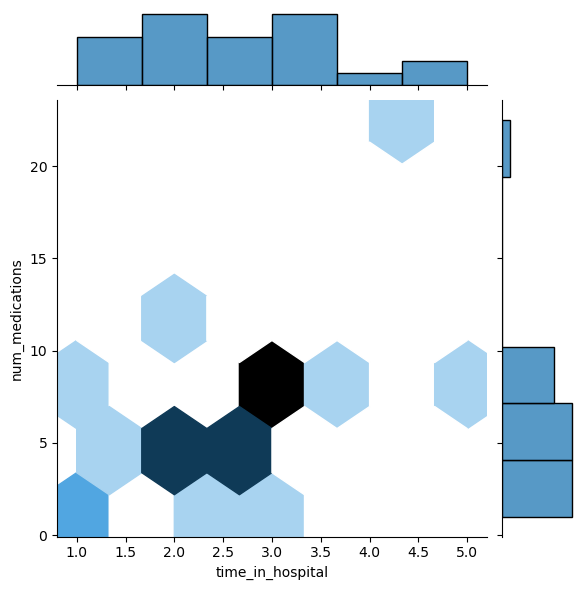

In [50]:
#To visualize the time in hospital in relation to the number of medications. Here we can see that there was a greater
#frequency between 2.5 and 3.3 days at the hospital and roughly 5 medications on average
df6 = df5.groupby (['diag_1','race']).agg({'encounter_id':'count','time_in_hospital':'mean','num_medications':'mean','gender':'first'})
sns.jointplot(x='time_in_hospital', y='num_medications', data=df6, kind='hex')


C:\Users\Marcelo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


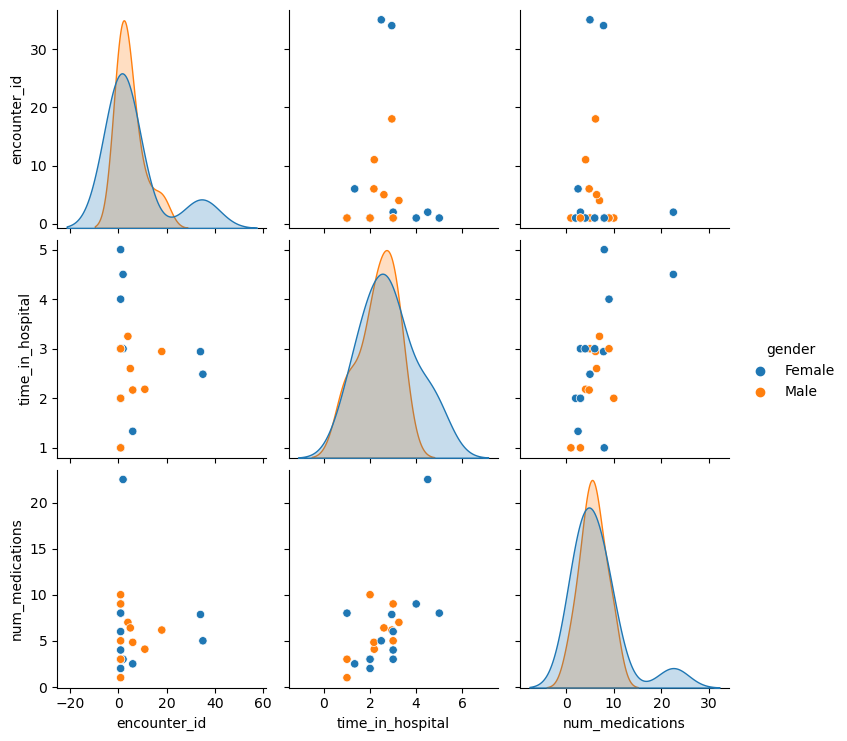

In [51]:
#Here we can observe number of hospitalizations, time at the hospital and number of medications by gender.
sns.pairplot(df6, hue='gender')


<Axes: xlabel='gender', ylabel='time_in_hospital'>

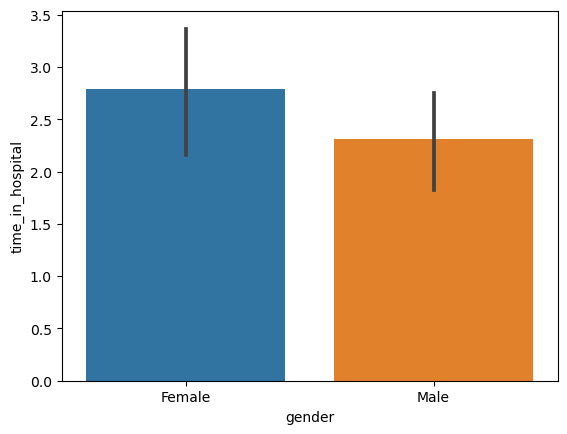

In [52]:
#To see number of hospitalizations by gender. 
sns.barplot(x='gender', y='time_in_hospital', data=df6)


<Axes: xlabel='race', ylabel='time_in_hospital'>

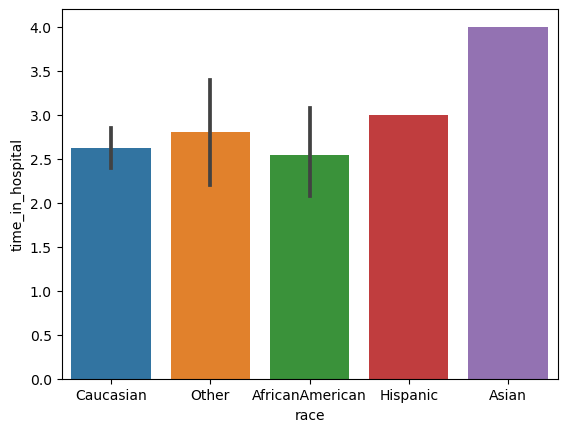

In [53]:
#To see the time at the hospital by race
sns.barplot(x='race', y='time_in_hospital', data=df5)

In [54]:
# Exploring how to link the diagnostic description with the code. Create a sample dataframe with diag_1 column.
# Created a new dataframe with the columns I need


df7 = df5[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 
    'time_in_hospital','num_medications', 'number_emergency', 'diag_1','change', 'diabetesMed', 'readmitted']]

# Create a dictionary for the diag_1 codes:
table = {'250': 'Diabetes mellitus without mention of complications',
         '250.01': 'Diabetes mellitus without mention of complications',
         '250.02': 'Diabetes mellitus without mention of complications',
         '250.03': 'Diabetes mellitus without mention of complications',
         '250.11': 'Diabetes with ketoacidosis',
         '250.12': 'Diabetes with ketoacidosis',
         '250.13': 'Diabetes with ketoacidosis',
         '250.31': 'Diabetes with other coma',
         '250.33': 'Diabetes with other coma',
         '250.81': 'Diabetes with other specified manifestations',
         '250.83': 'Diabetes with other specified manifestations',
         '250.93': 'Diabetes with unspecified complications'}

# Map the diag_1 column to the dictionary values
df7['description'] = df7['diag_1'].map(table)

# Print the result
print(df7)

        encounter_id  patient_nbr       race  gender   age  time_in_hospital  \
0            2278392      8222157  Caucasian  Female  0-10                 1   
216          2735964      2359485  Caucasian  Female  0-10                 3   
270          2968386      8568180  Caucasian  Female  0-10                 2   
294          3108096      5832918  Caucasian  Female  0-10                 1   
513          4337124      9124884      Other    Male  0-10                 3   
...              ...          ...        ...     ...   ...               ...   
65251      181828446     42417819  Caucasian  Female  0-10                 2   
84932      268539312     74164347  Caucasian  Female  0-10                 1   
89538      289449318     42247008  Caucasian    Male  0-10                 2   
93803      340724906     42347718  Caucasian    Male  0-10                 1   
100787     430828958    146717159  Caucasian  Female  0-10                 3   

        num_medications  number_emergen

In [55]:
#Since there are codes with the same description, I proceeded to group by description and see how many cases were 
#hospitalized for those descriptions as well as the average time at the hospital and the average number of medications 
df7.groupby(['description']).agg({'encounter_id':'count','time_in_hospital':'mean','num_medications':'mean'})


,encounter_id,time_in_hospital,num_medications
description,,,
Diabetes mellitus without mention of complications,59,2.372881,4.559322
Diabetes with ketoacidosis,62,3.000000,7.290323
Diabetes with other coma,3,3.333333,17.666667
Diabetes with other specified manifestations,11,1.909091,4.272727
Diabetes with unspecified complications,1,1.000000,3.000000


# Conclusion

In the [0-10) years' age bracket of the patients diagnosed with diabetes and admitted to the hospital, I could observe
that the median of days in the hospital were 2 and the number of medications administered were 5. Meanwhile the mean
shows 2.6 and 6.1 respectively. This means that the mean and median do not coincide because of outliers. 
Another observation is that there were more females 72 (53%) hospitalized than males 64 (47%) and these were largely 
concentrated on the caucasians with 62 females and 54 males. The asian females were the ones that spent more time on average
at the hospital. This could be influenced purely by the number of females. Last but not least, from the above table we can see
the number of cases hospitalized according to their diagnosis along with the average time at the hospital and medications received.